In [1]:
import obspy as obs
from obspy.clients.fdsn import RoutingClient
from numpy import arange

import matplotlib.pyplot as plt

from andbro__querrySeismoData import __querrySeismoData

In [2]:
path = "/home/andbro/Documents/ROMY/data/"

In [3]:
route = RoutingClient("eida-routing")

In [4]:
BJZ_10_r = obs.read(path+"ROMY_BJZ_2021-02-10.mseed"); BJZ_10 = BJZ_10_r.copy()
BJZ_11_r = obs.read(path+"ROMY_BJZ_2021-02-11.mseed"); BJZ_11 = BJZ_11_r.copy()
BJZ_inv = route.get_stations(networtk="BW", station="ROMY", level="response")

BJV_10_r = obs.read(path+"ROMY_BJV_2021-02-10.mseed"); BJV_10 = BJV_10_r.copy()
BJV_11_r = obs.read(path+"ROMY_BJV_2021-02-11.mseed"); BJV_11 = BJV_11_r.copy()
BJV_inv = route.get_stations(networtk="BW", station="ROMY", level="response")

RLAS_10_r = obs.read(path+"RLAS_BJZ_2021-02-10.mseed"); RLAS_10 = RLAS_10_r.copy()
RLAS_11_r = obs.read(path+"RLAS_BJZ_2021-02-11.mseed"); RLAS_11 = RLAS_11_r.copy()
RLAS_inv = route.get_stations(networtk="BW", station="RLAS", level="response")


RLAS_10_r, RLAS_inv = __querrySeismoData("BW.RLAS..BJZ", "2021-02-10 00:00", "2021-02-10 23:59", restitute=True)
RLAS_11_r, RLAS_inv = __querrySeismoData("BW.RLAS..BJZ", "2021-02-11 00:00", "2021-02-11 23:59", restitute=True)

/home/andbro/anaconda3/envs/obs/lib/python3.7/site-packages/obspy/core/inventory/response.py:1193: UserWarning: The unit 'RAD/S' is not known to ObsPy. It will be assumed to be displacement for the calculations. This mostly does the right thing but please proceed with caution.
  warnings.warn(msg)
/home/andbro/anaconda3/envs/obs/lib/python3.7/site-packages/obspy/core/inventory/response.py:1193: UserWarning: The unit 'RAD/S' is not known to ObsPy. It will be assumed to be displacement for the calculations. This mostly does the right thing but please proceed with caution.
  warnings.warn(msg)


In [5]:
BJZ_10_r.remove_response(BJZ_inv)
BJZ_11_r.remove_response(BJZ_inv)

BJV_10_r.remove_response(BJV_inv)
BJV_11_r.remove_response(BJV_inv)

1 Trace(s) in Stream:
BW.ROMY..BJV | 2021-02-11T00:00:04.194000Z - 2021-02-11T23:58:59.994000Z | 20.0 Hz, 1726717 samples

In [23]:
e1_tbeg = obs.UTCDateTime("2021-02-10 13:20")
e1_tend = e1_tbeg + 120*60

e2_tbeg = obs.UTCDateTime("2021-02-10 18:36")
e2_tend = e2_tbeg + 120*60

e3_tbeg = obs.UTCDateTime("2021-02-10 21:32")
e3_tend = e3_tbeg + 120*60

e4_tbeg = obs.UTCDateTime("2021-02-11 06:52")
e4_tend = e4_tbeg + 120*60

In [24]:
def __make_event(tbeg, tend):
    
    if tbeg.day == 10:
        BJZ_10 = BJZ_10_r.copy()
        BJZ_10.trim(tbeg, tend)
        
        RLAS_10 = RLAS_10_r.copy()
        RLAS_10.trim(tbeg, tend)
#         BJV_10.trim(tbeg, tend)

#         event = obs.core.stream.Stream(traces=[BJZ_10[0], BJV_10[0], RLAS_10[0]])
        event = obs.core.stream.Stream(traces=[BJZ_10[0], RLAS_10[0]])
        
    elif tbeg.day == 11:
        
        BJZ_11 = BJZ_11_r.copy()
        BJZ_11.trim(tbeg, tend)
        
        RLAS_11 = RLAS_11_r.copy()
        RLAS_11.trim(tbeg, tend)
        
        event = obs.core.stream.Stream(traces=[BJZ_11[0], RLAS_11[0]])
    
    return event

In [40]:
event_1 = __make_event(e1_tbeg, e1_tend)
event_2 = __make_event(e2_tbeg, e2_tend)

event_3 = __make_event(e3_tbeg, e3_tend)

event_4 = __make_event(e4_tbeg, e4_tend)


In [41]:
event = event_2
et = e2_tbeg

In [42]:
event.detrend("linear")
# event_1.taper(0.2)

filtertype = 'lowpass'
if filtertype == 'bandpass':
    f_lower, f_upper = 0.001, 0.02
    event.filter('bandpass', freqmin=f_lower, freqmax=f_upper, corners=4, zerophase=True)
elif filtertype == 'lowpass':
    f_upper = 0.05
    event.filter('lowpass', freq=f_upper, corners=4, zerophase=True)

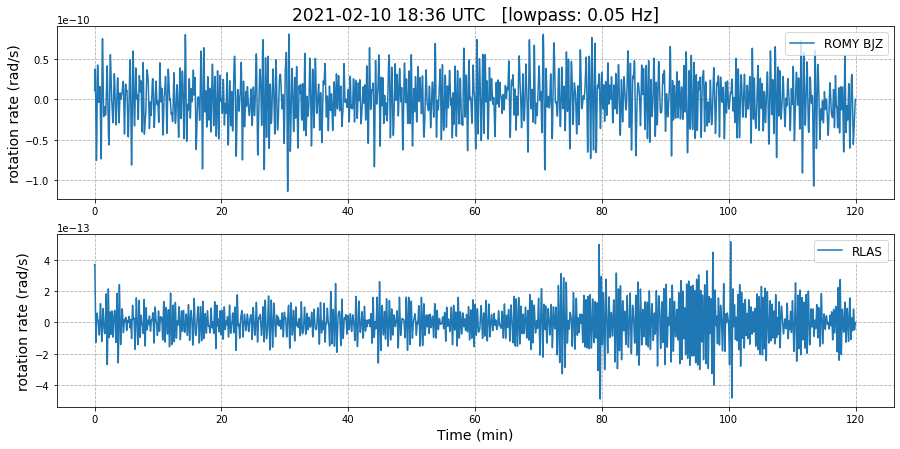

In [43]:
fig, ax = plt.subplots(2, 1, figsize=(15,7))

font = 14

timeline = arange(0, event[0].stats.delta*event[0].stats.npts, event[0].stats.delta)

ax[0].plot(timeline/60, event[0], label="ROMY BJZ")
ax[1].plot(timeline/60, event[1], label="RLAS")
# ax[2].plot(event[0].data - event[1].data)

ax[0].legend(fontsize = font-2, loc="upper right")
ax[1].legend(fontsize = font-2, loc="upper right")

ax[0].grid(ls='--', zorder=-1)
ax[1].grid(ls='--', zorder=-1)

ax[0].set_title(f"{et.date} {et.hour}:{et.minute} UTC   [{filtertype}: {f_upper} Hz]", fontsize=font+3)
ax[1].set_xlabel("Time (min)", fontsize=font)
ax[0].set_ylabel("rotation rate (rad/s)", fontsize=font)
ax[1].set_ylabel("rotation rate (rad/s)", fontsize=font)

plt.show();

